# Regression - Engineering

## Exercise 1: Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [1]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np

In [2]:
# exercise 1

tennis = pd.read_csv("../data/tennis.csv")
tennis_df = tennis.copy()
tennis_df = tennis_df.dropna(axis=0)
tennis_df.reset_index(inplace = True)
pd.get_dummies(tennis_df['surface'])

,Indoor: Carpet,Indoor: Hard,Outdoor: Clay,Outdoor: Grass,Outdoor: Hard
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1011,0,0,0,0,1
1012,0,0,0,0,1
1013,0,0,0,0,1
1014,0,0,0,0,1


In [3]:
X = pd.get_dummies(tennis_df['surface'],drop_first=True)
X = sm.add_constant(X)
y = tennis_df['player1 total points won']
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()

results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_coefs = []
results_df.apply(lambda row: all_coefs.append(row['coef']), axis=1)

features = list(pd.get_dummies(tennis_df['surface']).columns)
print(f"The average points for {features[0]} is: {all_coefs[0]}.")
for i in range(1,len(features)):
    print(f"The average points for {features[i]} is: {all_coefs[0]+all_coefs[i]}.")
    
print(f"\nThe mean squared error is: {round(est.mse_model)}.")

print("\n1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.",
      "\n\nIn this regression model prediciting the points won by Federer using the type of surface played on, the constant",
      "\nvariable is equal to 83.2281, representing the points won by Federer on the surface type indoor carpet,",
      f"\nfollowing by {all_coefs[0]+all_coefs[1]} points on the indoor hard type surface, {all_coefs[0]+all_coefs[2]} on the outdoor clay type surface,",
      f"\n{all_coefs[0]+all_coefs[3]} points on the outdoor grass type surface, and {all_coefs[0]+all_coefs[4]} points on outdoor hard type surface.",
      "\nThe surface type predicting most points for Federer is the outdoor grass type. The p-value for the indoor hard, the outdoor",
      "\nclay, and the outdoor hard type surfaces all have p-values over 0.05, meaning that they are not statistically significant and",
      "\ncannot be used. However, the p-values for the indoor carpet (constant) and outdoor grass are under 0.05 and statistically ",
      "\nsignificant.\n\n")

print("2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?",
      "\n\nThis regression should include a constant term since we are dropping the first column of the dummies dataframe for the types ",
      "\nof surfaces and using the intercept in place of that first type of surface in the model, here replacing the indoor carpet type.",
      "\nTo exclude a constant term for the model would change the coefficients so as to directly express the average number of points",
      "\nwon by Federer on that surface type, as opposed to the difference from the constant (indoor carpet) value as it is shown",
      "\nin the model with the constant. It would also set all p-values for the surface types to near 0 and less than 0.05,",
      "\nwhich makes every surface type useful for the model. The only problem is that since there is no constant value,",
      "\nthe average points for the indoor carpet type surface is not shown in the model.")

dummy_df = pd.get_dummies(tennis_df['surface'])
ttest = sm.stats.ttest_ind(dummy_df['Outdoor: Grass'], dummy_df['Outdoor: Clay'])

print("\n\n3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest",
      "\n(hint: you can run a t-test only with mean values and standard deviations)\n",
      "\nThe p-value for the t-test between the highest coefficient and the second highest coefficient is far less than 0.05,",
      "\nand so is the difference between them is statistically significant with a p-value of around 4.14e-08.\n"
      ,ttest)
summary

The average points for Indoor: Carpet is: 83.2281.
The average points for Indoor: Hard is: 77.0825.
The average points for Outdoor: Clay is: 88.088.
The average points for Outdoor: Grass is: 98.6936.
The average points for Outdoor: Hard is: 87.8189.

The mean squared error is: 9344.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

In this regression model prediciting the points won by Federer using the type of surface played on, the constant 
variable is equal to 83.2281, representing the points won by Federer on the surface type indoor carpet, 
following by 77.0825 points on the indoor hard type surface, 88.088 on the outdoor clay type surface, 
98.6936 points on the outdoor grass type surface, and 87.8189 points on outdoor hard type surface. 
The surface type predicting most points for Federer is the outdoor grass type. The p-value for the indoor hard, the outdoor 
clay, and the outdoor hard type surfaces all have p-values over 0.05, mean

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     16.93
Date:                      Mon, 19 Dec 2022   Prob (F-statistic):           1.91e-13
Time:                              13:56:43   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.411     24.403      0.000      76.543      89.913
Indoor: Hard      -6.1456      3.629     -1.693      0.090     -13.259       0.968
Outdoor: Clay      4.8599      3.990      1.218      0.223      -2.961      12.680
Outdoor: Grass    15.4655      4.524      3.419      0.001       6.599      24.332
Outdoor: Hard      4.5908      3.659      1.255      0.210      -2.581      11.762
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [4]:
X = pd.get_dummies(tennis_df['surface'],drop_first=True)
y = tennis_df['player1 total points won']
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()
    
print(f"\nThe mean squared error is: {round(est.mse_model)}.")
summary


The mean squared error is: 1828554.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.865
Method:                       Least Squares   F-statistic:                              2790.
Date:                      Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                              13:56:43   Log-Likelihood:                         -5009.2
No. Observations:                      1016   AIC:                                  1.003e+04
Df Residuals:                          1012   BIC:                                  1.005e+04
Df Model:                                 4                                                  
Covariance Type:                        HC2                                                  
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Hard      77.0825      1.241     62.097      0.000      74.650      79.515
Outdoor: Clay     88.0880      2.071     42.537      0.000      84.029      92.147
Outdoor: Grass    98.6935      2.972     33.206      0.000      92.868     104.519
Outdoor: Hard     87.8188      1.325     66.281      0.000      85.222      90.416
==============================================================================
Omnibus:                      212.052   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.573
Skew:                           1.209   Prob(JB):                     3.49e-91
Kurtosis:                       4.998   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
"""

## Exercise 2: Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [5]:
# exercise 2

import seaborn as sns 
import matplotlib.pyplot as plt 

titanic_df = sns.load_dataset('titanic')
titanic_df['class'] = titanic_df['class'].astype(str)
titanic_df['deck'] = titanic_df['deck'].astype(str)

#dropping redudant columns (alive==survived, pclass==class, embarked==embark_town)
titanic_df.drop('alive',axis=1,inplace=True)
titanic_df.drop('pclass',axis=1,inplace=True)
titanic_df.drop('embarked',axis=1,inplace=True)

titanic_df.dropna(inplace=True)
titanic_df['alone'] = titanic_df['alone'].apply(lambda row: int(row))
titanic_df['adult_male'] = titanic_df['adult_male'].apply(lambda row: int(row))

cat_cols = ['sex','class','embark_town','who']

y = titanic_df['survived']
X = titanic_df[['age','fare']].copy()

X = X.join(titanic_df['sibsp']).join(titanic_df['parch'])
X = X.join(titanic_df['adult_male']).join(titanic_df['alone'])

for col in cat_cols:
    X = X.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))

X = X.join(pd.get_dummies(titanic_df['deck']))
X = X.drop('nan',axis=1)
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')

summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model,3)}.")
print("\n1. Use non-regularized regression to build the best model you can.",
      "\nShow 2 alternate model speficications and explain why you chose the one you did.")
print("\nThis first model is one where I've dropped redundant columns and added a constant.This model has the same",
      "\nmean squared error as the second model, but without the redundant columns of pclass and embarked which correspond",
      "nto class and embark_town, which I've kept. The third model has no constant added to X. I chose this model because",
      "\nit has a lower mean squared error of 4.107 compared to the last model, which as an MSE of 9.386 and because it doesn't",
      "\ninclude redundant data.")
print("\n\n2. Interpret the coefficients in your model. Which attributes best relate to survival probability?",
      '\nHow does this relate to socio-economic characteristics and "real-world" interpretation?')
print("\nThe age feature has a small negative coefficient, indicating that the older someone was, the less they had a chance",
      "\nof surviving. The coeff for fare indicates that the more someone paid, the more they had a chance of survival.",
      "\nBoth the number of siblings and parents lowers the chance at survival, the more the number of siblings (sibsp)",
      "\nor parents (parch) increase. Being an adult male lowers the chance at survival, its coefficient also being negative.",
      "\nBeing a male lowers the chance of survival, its coefficient being negative."
      "\nBeing alone lowers the chance of survival, the coefficient being negative. Being in second class lowers the chance",
      "\nat survival, the coef being negative, and being in third class lowers the chances even more, the coef being a larger",
      "\nnegative number. Embarking from Queenstown or Southampton lowers chances of survival, their coefs being negative.",
      "\nbeing a man lowers chances of survival (who_man) and being a woman (who_woman) is relatively similar or slightly more",
      "\npositive than being a child and increases chances of survival as opposed to being a man.",
      "\n\nThe highest coefficients relate best to survival probability, such as being a woman or child as opposed to an adult",
      "\nmale, being in third class which strongly decreases survival rate, and the deck being A or E increased survival as",
      "\nopposed to the other ones. The way the attributes of 'adult_male', 'who_man', and 'class_third' relate to socio-economic",
      "\ncharacteristics and real-world interpretation is that many of the children and women were boarded first on the boats to",
      "\nescape the titanic and third class passengers were likely given less opportunity to board those safety boats as well.")
summary

The mean squared error is: 4.107.

1. Use non-regularized regression to build the best model you can. 
Show 2 alternate model speficications and explain why you chose the one you did.

This first model is one where I've dropped redundant columns and added a constant.This model has the same 
mean squared error as the second model, but without the redundant columns of pclass and embarked which correspond nto class and embark_town, which I've kept. The third model has no constant added to X. I chose this model because 
it has a lower mean squared error of 4.107 compared to the last model, which as an MSE of 9.386 and because it doesn't 
include redundant data.


2. Interpret the coefficients in your model. Which attributes best relate to survival probability? 
How does this relate to socio-economic characteristics and "real-world" interpretation?

The age feature has a small negative coefficient, indicating that the older someone was, the less they had a chance 
of surviving. The coeff fo

C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     57.37
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          4.09e-128
Time:                        13:56:44   Log-Likelihood:                -287.44
No. Observations:                 712   AIC:                             614.9
Df Residuals:                     692   BIC:                             706.2
Df Model:                          19                                         
Covariance Type:                  HC2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1072      0.107     10.381      0.000       0.898       1.316
age                        -0.0036      0.001     -2.936      0.003      -0.006      -0.001
fare                        0.0006      0.000      1.802      0.072   -4.98e-05       0.001
sibsp                      -0.1189      0.021     -5.788      0.000      -0.159      -0.079
parch                      -0.0569      0.022     -2.556      0.011      -0.100      -0.013
adult_male                 -0.2578      0.038     -6.781      0.000      -0.332      -0.183
alone                      -0.1052      0.043     -2.438      0.015      -0.190      -0.021
sex_male                   -0.0311      0.083     -0.374      0.709      -0.194       0.132
class_Second               -0.0857      0.077     -1.110      0.267      -0.237       0.066
class_Third                -0.2294      0.080     -2.866      0.004      -0.386      -0.073
embark_town_Queenstown     -0.1089      0.081     -1.337      0.181      -0.268       0.051
embark_town_Southampton    -0.0485      0.042     -1.155      0.248      -0.131       0.034
who_man                    -0.2578      0.038     -6.781      0.000      -0.332      -0.183
who_woman                   0.0041      0.076      0.054      0.957      -0.145       0.153
A                           0.1999      0.159      1.261      0.207      -0.111       0.511
B                           0.0711      0.084      0.851      0.395      -0.093       0.235
C                          -0.0030      0.089     -0.034      0.973      -0.177       0.171
D                           0.1333      0.089      1.499      0.134      -0.041       0.307
E                           0.2107      0.097      2.180      0.029       0.021       0.400
F                           0.1220      0.063      1.936      0.053      -0.001       0.246
G                          -0.1561      0.301     -0.518      0.604      -0.747       0.434
==============================================================================
Omnibus:                       36.077   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.847
Skew:                           0.537   Prob(JB):                     1.35e-09
Kurtosis:                       3.472   Cond. No.                     4.46e+16
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 1.56e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
titanic_df = sns.load_dataset('titanic')
titanic_df['class'] = titanic_df['class'].astype(str)
titanic_df['deck'] = titanic_df['deck'].astype(str)
titanic_df.drop('alive',axis=1,inplace=True)

# change in model: not dropping redudant columns (pclass==class, embarked==embark_town)
# titanic_df.drop('pclass',axis=1,inplace=True)
# titanic_df.drop('embarked',axis=1,inplace=True)

titanic_df.dropna(inplace=True)
titanic_df['alone'] = titanic_df['alone'].apply(lambda row: int(row))
titanic_df['adult_male'] = titanic_df['adult_male'].apply(lambda row: int(row))

cat_cols = ['sex','class','embark_town','pclass','who','embarked']

y = titanic_df['survived']
X = titanic_df[['age','fare']].copy()

X = X.join(titanic_df['sibsp']).join(titanic_df['parch'])
X = X.join(titanic_df['adult_male']).join(titanic_df['alone'])

for col in cat_cols:
    X = X.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))

X = X.join(pd.get_dummies(titanic_df['deck']))
X = X.drop('nan',axis=1)
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()

print(f"The mean squared error is: {round(est.mse_model,3)}.")
summary

The mean squared error is: 4.107.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 19
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     57.37
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          4.09e-128
Time:                        13:56:44   Log-Likelihood:                -287.44
No. Observations:                 712   AIC:                             614.9
Df Residuals:                     692   BIC:                             706.2
Df Model:                          19                                         
Covariance Type:                  HC2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1072      0.107     10.381      0.000       0.898       1.316
age                        -0.0036      0.001     -2.936      0.003      -0.006      -0.001
fare                        0.0006      0.000      1.802      0.072   -4.98e-05       0.001
sibsp                      -0.1189      0.021     -5.788      0.000      -0.159      -0.079
parch                      -0.0569      0.022     -2.556      0.011      -0.100      -0.013
adult_male                 -0.2578      0.038     -6.781      0.000      -0.332      -0.183
alone                      -0.1052      0.043     -2.438      0.015      -0.190      -0.021
sex_male                   -0.0311      0.083     -0.374      0.709      -0.194       0.132
class_Second               -0.0429      0.039     -1.110      0.267      -0.119       0.033
class_Third                -0.1147      0.040     -2.866      0.004      -0.193      -0.036
embark_town_Queenstown     -0.0544      0.041     -1.337      0.181      -0.134       0.025
embark_town_Southampton    -0.0243      0.021     -1.155      0.248      -0.065       0.017
pclass_2                   -0.0429      0.039     -1.110      0.267      -0.119       0.033
pclass_3                   -0.1147      0.040     -2.866      0.004      -0.193      -0.036
who_man                    -0.2578      0.038     -6.781      0.000      -0.332      -0.183
who_woman                   0.0041      0.076      0.054      0.957      -0.145       0.153
embarked_Q                 -0.0544      0.041     -1.337      0.181      -0.134       0.025
embarked_S                 -0.0243      0.021     -1.155      0.248      -0.065       0.017
A                           0.1999      0.159      1.261      0.207      -0.111       0.511
B                           0.0711      0.084      0.851      0.395      -0.093       0.235
C                          -0.0030      0.089     -0.034      0.973      -0.177       0.171
D                           0.1333      0.089      1.499      0.134      -0.041       0.307
E                           0.2107      0.097      2.180      0.029       0.021       0.400
F                           0.1220      0.063      1.936      0.053      -0.001       0.246
G                          -0.1561      0.301     -0.518      0.604      -0.747       0.434
==============================================================================
Omnibus:                       36.077   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.847
Skew:                           0.537   Prob(JB):                     1.35e-09
Kurtosis:                       3.472   Cond. No.                     3.75e+18
==============================================================================

Notes:
[1] Standard Errors are h

In [8]:
from sklearn.model_selection import train_test_split

titanic_df = sns.load_dataset('titanic')
titanic_df['class'] = titanic_df['class'].astype(str)
titanic_df['deck'] = titanic_df['deck'].astype(str)
titanic_df.drop('alive',axis=1,inplace=True)
titanic_df.drop('pclass',axis=1,inplace=True)
titanic_df.drop('embarked',axis=1,inplace=True)

titanic_df.dropna(inplace=True)
titanic_df['alone'] = titanic_df['alone'].apply(lambda row: int(row))
titanic_df['adult_male'] = titanic_df['adult_male'].apply(lambda row: int(row))

cat_cols = ['sex','class','embark_town','who']

y = titanic_df['survived']
X = titanic_df[['age','fare']].copy()

X = X.join(titanic_df['sibsp']).join(titanic_df['parch'])
X = X.join(titanic_df['adult_male']).join(titanic_df['alone'])

for col in cat_cols:
    X = X.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))

X = X.join(pd.get_dummies(titanic_df['deck']))
X = X.drop('nan',axis=1)

# change in model: not adding constant
# X=sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_pred_worst = est.predict(X_test)

print(f"The mean squared error is: {round(est.mse_model,3)}.")
summary

The mean squared error is: 9.386.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               survived   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              84.93
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                   1.92e-166
Time:                        13:57:57   Log-Likelihood:                         -344.35
No. Observations:                 712   AIC:                                      726.7
Df Residuals:                     693   BIC:                                      813.5
Df Model:                          19                                                  
Covariance Type:                  HC2                                                  
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.0003      0.001     -0.278      0.781      -0.003       0.002
fare                        0.0017      0.000      5.647      0.000       0.001       0.002
sibsp                      -0.0556      0.023     -2.430      0.015      -0.100      -0.011
parch                      -0.0211      0.025     -0.835      0.404      -0.071       0.028
adult_male                 -0.2323      0.043     -5.425      0.000      -0.316      -0.148
alone                       0.0117      0.047      0.249      0.803      -0.080       0.104
sex_male                    0.2451      0.096      2.543      0.011       0.056       0.434
class_Second                0.4160      0.080      5.189      0.000       0.259       0.573
class_Third                 0.2987      0.081      3.672      0.000       0.139       0.458
embark_town_Queenstown     -0.0775      0.091     -0.854      0.393      -0.255       0.100
embark_town_Southampton     0.0166      0.048      0.348      0.728      -0.077       0.110
who_man                    -0.2323      0.043     -5.425      0.000      -0.316      -0.148
who_woman                   0.3242      0.084      3.853      0.000       0.159       0.489
A                           0.6634      0.155      4.275      0.000       0.359       0.968
B                           0.4921      0.087      5.632      0.000       0.321       0.663
C                           0.4066      0.093      4.360      0.000       0.224       0.589
D                           0.5371      0.093      5.802      0.000       0.356       0.719
E                           0.5663      0.106      5.324      0.000       0.358       0.775
F                           0.1689      0.087      1.948      0.051      -0.001       0.339
G                           0.0583      0.308      0.189      0.850      -0.545       0.661
==============================================================================
Omnibus:                       34.930   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.818
Skew:                           0.564   Prob(JB):                     3.72e-09
Kurtosis:                       3.193   Cond. No.                     1.29e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
[3] The smallest eigenvalue is 1.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The mean squared error is: 3.721.

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? 
Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

The accuracy is higher since the mean squared error is lower compared to the interpretable model (3.721 vs 4.107). 
This can be attributed to the higher degree of freedom the regularized model has compared to the interpretable one (21 vs 19).


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 21
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.51
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.16e-127
Time:                        14:01:07   Log-Likelihood:                -287.05
No. Observations:                 712   AIC:                             618.1
Df Residuals:                     690   BIC:                             718.6
Df Model:                          21                                         
Covariance Type:                  HC2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1399      0.117      9.773      0.000       0.911       1.369
age                        -0.0032      0.005     -0.585      0.559      -0.014       0.007
fare                       -0.0002      0.001     -0.171      0.864      -0.002       0.002
age2                    -5.926e-06   7.14e-05     -0.083      0.934      -0.000       0.000
fare2                    1.732e-06   1.88e-06      0.920      0.357   -1.96e-06    5.42e-06
sibsp                      -0.1162      0.021     -5.541      0.000      -0.157      -0.075
parch                      -0.0538      0.023     -2.379      0.017      -0.098      -0.009
adult_male                 -0.2599      0.050     -5.224      0.000      -0.357      -0.162
alone                      -0.1089      0.043     -2.544      0.011      -0.193      -0.025
sex_male                   -0.0308      0.084     -0.367      0.714      -0.195       0.134
class_Second               -0.1063      0.082     -1.293      0.196      -0.267       0.055
class_Third                -0.2553      0.088     -2.915      0.004      -0.427      -0.084
embark_town_Queenstown     -0.1099      0.082     -1.341      0.180      -0.270       0.051
embark_town_Southampton    -0.0490      0.042     -1.164      0.244      -0.132       0.034
who_man                    -0.2599      0.050     -5.224      0.000      -0.357      -0.162
who_woman                   0.0030      0.095      0.032      0.975      -0.183       0.189
A                           0.1947      0.159      1.222      0.222      -0.118       0.507
B                           0.0749      0.085      0.883      0.377      -0.091       0.241
C                           0.0093      0.091      0.102      0.919      -0.169       0.188
D                           0.1357      0.089      1.526      0.127      -0.039       0.310
E                           0.2094      0.097      2.157      0.031       0.019       0.400
F                           0.1216      0.063      1.927      0.054      -0.002       0.245
G                          -0.1608      0.302     -0.533      0.594      -0.753       0.431
==============================================================================
Omnibus:                       36.104   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.052
Skew:                           0.534   Prob(JB):                     1.22e-09
Kurtosis:                       3.495   Cond. No.                     2.62e+19
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 3.97e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

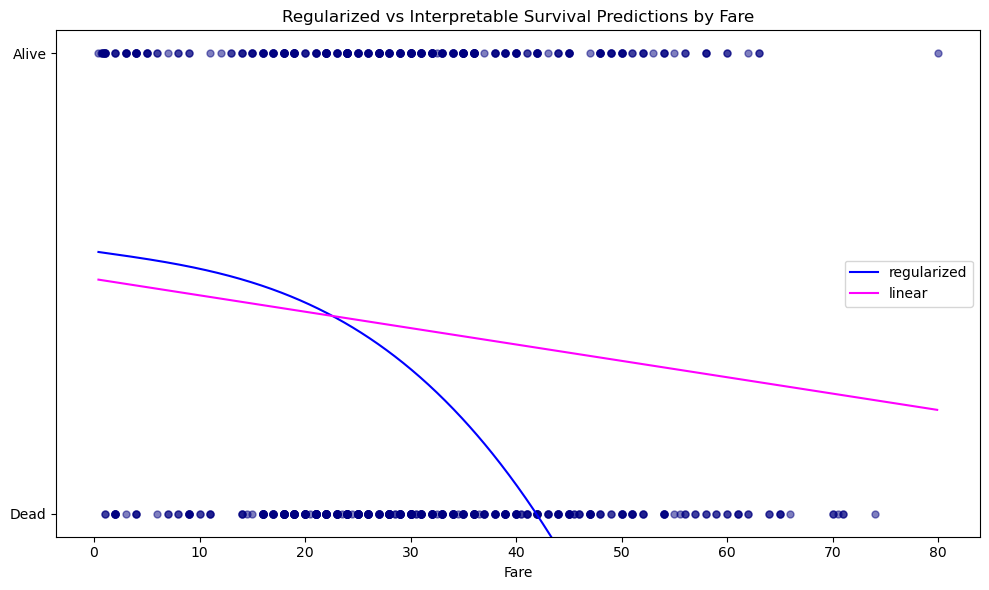

In [17]:
"""
Regularized model: polynomial features (age2 and fare2)
"""

titanic_df = sns.load_dataset('titanic')
titanic_df['class'] = titanic_df['class'].astype(str)
titanic_df['deck'] = titanic_df['deck'].astype(str)

#dropping redudant columns (alive==survived, pclass==class, embarked==embark_town)
titanic_df.drop('alive',axis=1,inplace=True)
titanic_df.drop('pclass',axis=1,inplace=True)
titanic_df.drop('embarked',axis=1,inplace=True)

titanic_df.dropna(inplace=True)
titanic_df['alone'] = titanic_df['alone'].apply(lambda row: int(row))
titanic_df['adult_male'] = titanic_df['adult_male'].apply(lambda row: int(row))

cat_cols = ['sex','class','embark_town','who']

y = titanic_df['survived']
X = titanic_df[['age','fare']].copy()

# Regularizing
X['age2'] = X.age ** 2
X['fare2'] = X.fare ** 2

X = X.join(titanic_df['sibsp']).join(titanic_df['parch'])
X = X.join(titanic_df['adult_male']).join(titanic_df['alone'])

for col in cat_cols:
    X = X.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))

X = X.join(pd.get_dummies(titanic_df['deck']))
X = X.drop('nan',axis=1)
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')


features = list(X.columns)

means_list = []
input_df = {'const':1.0}
for i in range(len(features)):
    means_list.append(X[features[i]].mean())
for j in range(len(features)):
    input_df[features[j]]=means_list[j]
input_df = pd.DataFrame(input_df,index = range(1000))

min_feature = X['age'].min()
max_feature = X['age'].max()
ticks = (max_feature-min_feature)/1000
n=min_feature
for i in range(len(input_df['age'])):
    input_df['age'].iloc[i] = n
    n += ticks
    
input_df['fare2'] = input_df['fare'].apply(lambda row: row**3)
input_df['age2'] = input_df['age'].apply(lambda row: row**3)

    
Xfit = input_df
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))

##############################################################################################################################

y = titanic_df['survived']
X2 = titanic_df[['age','fare']].copy()

X2 = X2.join(titanic_df['sibsp']).join(titanic_df['parch'])
X2 = X2.join(titanic_df['adult_male']).join(titanic_df['alone'])

for col in cat_cols:
    X2 = X2.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))

X2 = X2.join(pd.get_dummies(titanic_df['deck']))
X2 = X2.drop('nan',axis=1)
X2 = sm.add_constant(X2)
est2 = sm.OLS(y,X2).fit(cov_type='HC2')

features = list(X2.columns)

means_list = []
input_df = {'const':1.0}
for i in range(len(features)):
    means_list.append(X2[features[i]].mean())
for j in range(len(features)):
    input_df[features[j]]=means_list[j]
input_df = pd.DataFrame(input_df,index = range(1000))

min_feature = X2['age'].min()
max_feature = X2['age'].max()
ticks = (max_feature-min_feature)/1000
n=min_feature
for i in range(len(input_df['age'])):
    input_df['age'].iloc[i] = n
    n += ticks
    
Xfit2 = input_df
yfit2 = est2.predict(Xfit2)
Xfit2 = np.squeeze(np.asarray(Xfit2))
X2 = np.squeeze(np.asarray(X2))
    
##############################################################################################################################

print(f"The mean squared error is: {round(est.mse_model,3)}.")
summary = est.summary()

print("\n3. Use regularized regression to build a purely predictive model. Can you improve your accuracy?",
      "\nPlot the regularized model against the interpretable model predictions in a regression plot to make your case.")
print("\nThe accuracy is higher since the mean squared error is lower compared to the interpretable model (3.721 vs 4.107).",
      "\nThis can be attributed to the higher degree of freedom the regularized model has compared to the interpretable one",
      f"({round(est.df_model)} vs {round(est2.df_model)}).")


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,1],y,s=25,color='navy',alpha=0.5)
ax.plot(Xfit[:,1],yfit,color='blue',label='regularized')
ax.plot(Xfit2[:,1],yfit2,color='magenta',label='linear')
ax.set_yticks([0,1.0])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Fare')
ax.set_yticklabels(['Dead','Alive'])
ax.set_title('Regularized vs Interpretable Survival Predictions by Fare')
ax.legend(loc='center right')
fig.tight_layout()

summary

## Exercise 3: House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [10]:
# exercise 3

house = pd.read_csv("../data/house_price.csv")
house_df = house.copy()
house_df.drop('Id',axis=1,inplace=True)
house_df.drop('Alley',axis=1,inplace=True)
house_df.drop('FireplaceQu',axis=1,inplace=True)
house_df.drop('PoolQC',axis=1,inplace=True)
house_df.drop('Fence',axis=1,inplace=True)
house_df.drop('MiscFeature',axis=1,inplace=True)
house_df.dropna(inplace=True)
house_df.reset_index(drop=True,inplace=True)


num_cols = list(house_df.select_dtypes(include=['float', 'int']).columns)
num_cols.remove('SalePrice')
cat_cols = list(house_df.select_dtypes(include=['object']).columns)

y = house_df['SalePrice']
X = house_df[num_cols]
X = sm.add_constant(X)

for col in cat_cols:
    X = X.join(pd.get_dummies(house_df[col],drop_first=True, prefix=col))


est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model):,d}.")

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_p = []
results_df.apply(lambda row: all_p.append(row['P>|z|']), axis=1)
all_p.pop(0)

summary

The mean squared error is: 32,476,462,179.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 221, but rank is 199
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5049.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:57:59   Log-Likelihood:                -12473.
No. Observations:                1094   AIC:                         2.538e+04
Df Residuals:                     876   BIC:                         2.647e+04
Df Model:                         217                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.575e+06   1.31e+06     -1.199      0.230   -4.15e+06    9.99e+05
MSSubClass               29.7241     97.154      0.306      0.760    -160.695     220.143
LotFrontage              87.1352     56.390      1.545      0.122     -23.387     197.657
LotArea                   0.8014      0.237      3.375      0.001       0.336       1.267
OverallQual            7003.6748   1419.527      4.934      0.000    4221.453    9785.897
OverallCond            6547.2825   1097.668      5.965      0.000    4395.893    8698.673
YearBuilt               303.1883     98.021      3.093      0.002     111.072     495.305
YearRemodAdd             71.1668     55.431      1.284      0.199     -37.477     179.810
MasVnrArea               19.9530     11.495      1.736      0.083      -2.577      42.483
BsmtFinSF1               17.9264      4.816      3.722      0.000       8.487      27.366
BsmtFinSF2                9.9894      5.791      1.725      0.085      -1.360      21.339
BsmtUnfSF                -1.7897      4.065     -0.440      0.660      -9.756       6.177
TotalBsmtSF              26.1261      6.036      4.329      0.000      14.296      37.956
1stFlrSF                 12.5913     10.995      1.145      0.252      -8.959      34.141
2ndFlrSF                 39.7598     10.333      3.848      0.000      19.508      60.011
LowQualFinSF            -20.8319     24.112     -0.864      0.388     -68.090      26.427
GrLivArea                31.5191     11.766      2.679      0.007       8.458      54.580
BsmtFullBath            151.7802   2431.641      0.062      0.950   -4614.149    4917.710
BsmtHalfBath          -1651.1848   3655.676     -0.452      0.652   -8816.177    5513.808
FullBath               4624.2583   3018.729      1.532      0.126   -1292.341    1.05e+04
HalfBath               2157.0555   2763.813      0.780      0.435   -3259.918    7574.029
BedroomAbvGr          -3694.1712   2139.849     -1.726      0.084   -7888.199     499.856
KitchenAbvGr          -1.462e+04   6597.462     -2.217      0.027   -2.76e+04   -1693.015
TotRmsAbvGrd            864.2936   1636.649      0.528      0.597   -2343.480    4072.068
Fireplaces             3051.2031   1993.627      1.530      0.126    -856.233    6958.640
GarageYrBlt              28.9540     79.607      0.364      0.716    -127.073     184.981
GarageCars             4515.5255   3122.468      1.446      0.148   -1604.398    1.06e+04
GarageArea               13.6227     17.539      0.777      0.437     -20.753      47.998
WoodDeckSF               10.5512      7.619      1.385      0.166      -4.383      25.485
OpenPorchSF              -4.1139     20.178     -0.204      0.838     -43.661      35.433
EnclosedPorch            -9.3040     17.852     -0.521      0.602     -44.293      25.685
3SsnPorch              

In [11]:
"""
Iteration 1: p-value method
"""

all_p = np.asarray(all_p)
sig_ind = list(np.where(all_p<=0.05)[0]+1)
features = np.asarray(X.columns)
sig_features = list(features[sig_ind])

X = X[sig_features]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model):,d}.")

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_p = []
results_df.apply(lambda row: all_p.append(row['P>|z|']), axis=1)
all_p.pop(0)

summary

The mean squared error is: 106,734,201,176.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 63, but rank is 57
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                -2.593e+09
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               1.00
Time:                        13:57:59   Log-Likelihood:                -12740.
No. Observations:                1094   AIC:                         2.561e+04
Df Residuals:                    1030   BIC:                         2.593e+04
Df Model:                          63                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.557e+06   2.04e+05     -7.627      0.000   -1.96e+06   -1.16e+06
LotArea                   0.5876      0.153      3.834      0.000       0.287       0.888
OverallQual            1.088e+04   1738.947      6.255      0.000    7469.124    1.43e+04
OverallCond            7567.4508    935.267      8.091      0.000    5734.360    9400.541
YearBuilt               441.3498     67.213      6.566      0.000     309.615     573.084
BsmtFinSF1               15.0719      3.966      3.800      0.000       7.298      22.845
TotalBsmtSF              30.8475      9.611      3.210      0.001      12.011      49.684
2ndFlrSF                 21.3678      7.289      2.932      0.003       7.082      35.654
GrLivArea                46.0882      8.426      5.470      0.000      29.573      62.603
KitchenAbvGr          -1.972e+04   6438.758     -3.062      0.002   -3.23e+04   -7098.127
MSZoning_FV             3.11e+04      1e+04      3.109      0.002    1.15e+04    5.07e+04
MSZoning_RH            1.497e+04   1.12e+04      1.337      0.181   -6969.987    3.69e+04
MSZoning_RL            1.682e+04   9607.024      1.751      0.080   -2011.013    3.56e+04
MSZoning_RM            1.228e+04   9432.110      1.302      0.193   -6206.204    3.08e+04
Street_Pave            2.852e+04    1.5e+04      1.900      0.057    -898.186    5.79e+04
LotConfig_CulDSac      1.306e+04   5787.235      2.257      0.024    1717.452    2.44e+04
LotConfig_FR2         -7514.9232   4445.507     -1.690      0.091   -1.62e+04    1198.111
Neighborhood_NoRidge   3.964e+04   1.01e+04      3.921      0.000    1.98e+04    5.95e+04
Neighborhood_StoneBr   4.216e+04   1.26e+04      3.347      0.001    1.75e+04    6.68e+04
Condition1_Norm        1.207e+04   4244.746      2.843      0.004    3746.157    2.04e+04
BldgType_Duplex       -8285.2869   6175.993     -1.342      0.180   -2.04e+04    3819.438
BldgType_Twnhs        -2.279e+04   5081.651     -4.484      0.000   -3.27e+04   -1.28e+04
BldgType_TwnhsE       -1.396e+04   4116.200     -3.392      0.001    -2.2e+04   -5894.189
HouseStyle_1Story      9550.9970   3517.421      2.715      0.007    2656.979    1.64e+04
HouseStyle_2.5Unf      -1.13e+04   7455.457     -1.516      0.130   -2.59e+04    3310.526
RoofStyle_Gable         3.93e+04   3.14e+04      1.252      0.211   -2.22e+04    1.01e+05
RoofStyle_Gambrel      4.564e+04   3.22e+04      1.418      0.156   -1.75e+04    1.09e+05
RoofStyle_Hip          3.978e+04   3.13e+04      1.271      0.204   -2.15e+04    1.01e+05
RoofStyle_Mansard      5.654e+04   3.26e+04      1.735      0.083   -7332.637     1.2e+05
RoofMatl_CompShg       6.416e+05   8.07e+04      7.951      0.000    4.83e+05       8e+05
RoofMatl_Membran       6.954e+05   9.47e+04      7.341      0.000     5.1e+05    8.81e+05
RoofMatl_Roll          

In [12]:
"""
Iteration 2: p-value method
"""

all_p = np.asarray(all_p)
sig_ind = list(np.where(all_p<=0.05)[0]+1)
features = np.asarray(X.columns)
sig_features = list(features[sig_ind])

X = X[sig_features]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model):,d}.")

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_p = []
results_df.apply(lambda row: all_p.append(row['P>|z|']), axis=1)
all_p.pop(0)

summary

The mean squared error is: 152,347,489,179.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 44, but rank is 38
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                -1.535e+08
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               1.00
Time:                        13:58:06   Log-Likelihood:                -12754.
No. Observations:                1094   AIC:                         2.560e+04
Df Residuals:                    1049   BIC:                         2.582e+04
Df Model:                          44                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.517e+06   1.55e+05     -9.768      0.000   -1.82e+06   -1.21e+06
LotArea                   0.5923      0.143      4.153      0.000       0.313       0.872
OverallQual            1.112e+04   1783.792      6.235      0.000    7625.617    1.46e+04
OverallCond            7824.4746    904.379      8.652      0.000    6051.924    9597.025
YearBuilt               464.7392     52.909      8.784      0.000     361.040     568.439
BsmtFinSF1               15.1288      3.796      3.985      0.000       7.689      22.569
TotalBsmtSF              30.5382      9.818      3.111      0.002      11.296      49.780
2ndFlrSF                 20.0834      7.453      2.695      0.007       5.476      34.691
GrLivArea                47.9237      7.699      6.225      0.000      32.834      63.014
KitchenAbvGr          -2.597e+04   6266.012     -4.145      0.000   -3.83e+04   -1.37e+04
MSZoning_FV            1.525e+04   3366.386      4.529      0.000    8648.806    2.18e+04
LotConfig_CulDSac      1.346e+04   5594.507      2.406      0.016    2495.325    2.44e+04
Neighborhood_NoRidge   3.873e+04      1e+04      3.862      0.000    1.91e+04    5.84e+04
Neighborhood_StoneBr   4.257e+04   1.23e+04      3.459      0.001    1.84e+04    6.67e+04
Condition1_Norm        1.178e+04   4124.284      2.856      0.004    3696.412    1.99e+04
BldgType_Twnhs        -2.515e+04   4757.287     -5.287      0.000   -3.45e+04   -1.58e+04
BldgType_TwnhsE        -1.45e+04   4197.921     -3.455      0.001   -2.27e+04   -6276.773
HouseStyle_1Story      9519.0288   3446.962      2.762      0.006    2763.108    1.63e+04
RoofMatl_CompShg       6.427e+05   7.74e+04      8.301      0.000    4.91e+05    7.94e+05
RoofMatl_Membran       6.595e+05   7.93e+04      8.318      0.000    5.04e+05    8.15e+05
RoofMatl_Roll          6.401e+05   7.31e+04      8.753      0.000    4.97e+05    7.83e+05
RoofMatl_Tar&Grv       6.116e+05   7.92e+04      7.723      0.000    4.56e+05    7.67e+05
RoofMatl_WdShake       6.433e+05   7.32e+04      8.789      0.000       5e+05    7.87e+05
RoofMatl_WdShngl       7.019e+05   7.34e+04      9.557      0.000    5.58e+05    8.46e+05
Exterior1st_BrkComm   -7.949e+04   6429.373    -12.363      0.000   -9.21e+04   -6.69e+04
Exterior1st_HdBoard   -6376.9453   2129.464     -2.995      0.003   -1.06e+04   -2203.272
Exterior1st_ImStucc   -1.999e+04   9836.445     -2.033      0.042   -3.93e+04    -714.093
Exterior1st_Plywood   -7966.0329   4229.778     -1.883      0.060   -1.63e+04     324.180
Exterior2nd_Brk Cmn    2.056e+04   5814.542      3.536      0.000    9161.429     3.2e+04
MasVnrType_Stone       1.244e+04   4167.533      2.986      0.003    4274.941    2.06e+04
ExterQual_Gd          -2.153e+04   9631.927     -2.235      0.025   -4.04e+04   -2647.477
ExterQual_TA          -

In [13]:
"""
Iteration 3: p-value method: p-value method
"""

all_p = np.asarray(all_p)
sig_ind = list(np.where(all_p<=0.05)[0]+1)
features = np.asarray(X.columns)
sig_features = list(features[sig_ind])

X = X[sig_features]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model):,d}.")

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_p = []
results_df.apply(lambda row: all_p.append(row['P>|z|']), axis=1)
all_p.pop(0)

summary

The mean squared error is: 159,488,243,436.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 36
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     508.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:58:06   Log-Likelihood:                -12757.
No. Observations:                1094   AIC:                         2.560e+04
Df Residuals:                    1051   BIC:                         2.582e+04
Df Model:                          42                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.499e+06   1.47e+05    -10.201      0.000   -1.79e+06   -1.21e+06
LotArea                   0.5958      0.139      4.280      0.000       0.323       0.869
OverallQual            1.119e+04   1776.653      6.300      0.000    7710.528    1.47e+04
OverallCond            7819.3665    893.143      8.755      0.000    6068.839    9569.894
YearBuilt               457.0097     51.047      8.953      0.000     356.959     557.061
BsmtFinSF1               14.8013      3.705      3.995      0.000       7.539      22.063
TotalBsmtSF              29.8538      9.899      3.016      0.003      10.452      49.256
2ndFlrSF                 20.6287      7.554      2.731      0.006       5.823      35.435
GrLivArea                47.6867      7.574      6.296      0.000      32.841      62.532
KitchenAbvGr          -2.722e+04   6469.334     -4.208      0.000   -3.99e+04   -1.45e+04
MSZoning_FV            1.558e+04   3410.589      4.569      0.000    8899.978    2.23e+04
LotConfig_CulDSac      1.373e+04   5564.167      2.468      0.014    2826.309    2.46e+04
Neighborhood_NoRidge   3.896e+04   9987.624      3.901      0.000    1.94e+04    5.85e+04
Neighborhood_StoneBr   4.315e+04   1.23e+04      3.522      0.000    1.91e+04    6.72e+04
Condition1_Norm        1.151e+04   4131.273      2.786      0.005    3414.299    1.96e+04
BldgType_Twnhs         -2.51e+04   4770.034     -5.261      0.000   -3.44e+04   -1.57e+04
BldgType_TwnhsE       -1.495e+04   4063.390     -3.679      0.000   -2.29e+04   -6984.768
HouseStyle_1Story      9914.9076   3433.069      2.888      0.004    3186.215    1.66e+04
RoofMatl_CompShg       6.381e+05   7.62e+04      8.378      0.000    4.89e+05    7.87e+05
RoofMatl_Membran       6.481e+05   7.62e+04      8.506      0.000    4.99e+05    7.97e+05
RoofMatl_Roll          6.367e+05   7.21e+04      8.830      0.000    4.95e+05    7.78e+05
RoofMatl_Tar&Grv       6.045e+05   7.69e+04      7.856      0.000    4.54e+05    7.55e+05
RoofMatl_WdShake        6.39e+05   7.23e+04      8.836      0.000    4.97e+05    7.81e+05
RoofMatl_WdShngl       6.957e+05   7.16e+04      9.714      0.000    5.55e+05    8.36e+05
Exterior1st_BrkComm   -7.205e+04   6199.855    -11.621      0.000   -8.42e+04   -5.99e+04
Exterior1st_HdBoard   -5541.6124   2141.506     -2.588      0.010   -9738.888   -1344.337
Exterior1st_ImStucc   -1.952e+04   9895.334     -1.972      0.049   -3.89e+04    -123.897
Exterior2nd_Brk Cmn    1.388e+04   5114.995      2.714      0.007    3856.887    2.39e+04
MasVnrType_Stone        1.27e+04   4195.141      3.027      0.002    4476.288    2.09e+04
ExterQual_Gd            -2.2e+04   9658.929     -2.277      0.023   -4.09e+04   -3064.756
ExterQual_TA          -2.448e+04   9172.807     -2.669      0.008   -4.25e+04   -6504.039
BsmtQual_Gd           -

In [14]:
"""
Iteration 4: p-value method -> all p values significant
"""

all_p = np.asarray(all_p)
sig_ind = list(np.where(all_p<=0.05)[0]+1)
features = np.asarray(X.columns)
sig_features = list(features[sig_ind])

X = X[sig_features]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')
summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model):,d}.")

# Extracting data from summary table
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]
all_p = []
results_df.apply(lambda row: all_p.append(row['P>|z|']), axis=1)
all_p.pop(0)

summary

The mean squared error is: 167,409,067,663.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 40, but rank is 34
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     529.2
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:58:06   Log-Likelihood:                -12758.
No. Observations:                1094   AIC:                         2.560e+04
Df Residuals:                    1053   BIC:                         2.580e+04
Df Model:                          40                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.522e+06   1.35e+05    -11.291      0.000   -1.79e+06   -1.26e+06
LotArea                   0.5948      0.138      4.311      0.000       0.324       0.865
OverallQual            1.139e+04   1765.015      6.454      0.000    7931.323    1.49e+04
OverallCond            7935.0803    872.057      9.099      0.000    6225.879    9644.282
YearBuilt               462.7916     47.185      9.808      0.000     370.312     555.272
BsmtFinSF1               15.0374      3.655      4.114      0.000       7.873      22.201
TotalBsmtSF              29.3885      9.977      2.946      0.003       9.834      48.943
2ndFlrSF                 20.0952      7.593      2.646      0.008       5.212      34.978
GrLivArea                47.9284      7.493      6.396      0.000      33.242      62.615
KitchenAbvGr          -2.669e+04   6230.621     -4.283      0.000   -3.89e+04   -1.45e+04
MSZoning_FV            1.543e+04   3405.909      4.529      0.000    8750.119    2.21e+04
LotConfig_CulDSac      1.386e+04   5513.904      2.513      0.012    3049.258    2.47e+04
Neighborhood_NoRidge    3.87e+04   9997.868      3.871      0.000    1.91e+04    5.83e+04
Neighborhood_StoneBr    4.35e+04   1.22e+04      3.563      0.000    1.96e+04    6.74e+04
Condition1_Norm        1.151e+04   4092.799      2.811      0.005    3485.102    1.95e+04
BldgType_Twnhs        -2.522e+04   4746.722     -5.313      0.000   -3.45e+04   -1.59e+04
BldgType_TwnhsE       -1.489e+04   4044.115     -3.683      0.000   -2.28e+04   -6967.992
HouseStyle_1Story      9709.8660   3423.080      2.837      0.005    3000.753    1.64e+04
RoofMatl_CompShg        6.38e+05   7.55e+04      8.450      0.000     4.9e+05    7.86e+05
RoofMatl_Membran        6.48e+05   7.52e+04      8.614      0.000    5.01e+05    7.95e+05
RoofMatl_Roll          6.367e+05   7.11e+04      8.950      0.000    4.97e+05    7.76e+05
RoofMatl_Tar&Grv       6.044e+05   7.62e+04      7.929      0.000    4.55e+05    7.54e+05
RoofMatl_WdShake       6.387e+05   7.17e+04      8.905      0.000    4.98e+05    7.79e+05
RoofMatl_WdShngl       6.971e+05   7.13e+04      9.784      0.000    5.57e+05    8.37e+05
Exterior1st_BrkComm   -7.136e+04   6114.760    -11.671      0.000   -8.33e+04   -5.94e+04
Exterior1st_HdBoard   -5327.0647   2126.645     -2.505      0.012   -9495.212   -1158.918
Exterior1st_ImStucc   -1.967e+04   9921.911     -1.983      0.047   -3.91e+04    -226.054
Exterior2nd_Brk Cmn    1.387e+04   5138.204      2.700      0.007    3801.919    2.39e+04
MasVnrType_Stone       1.257e+04   4190.316      3.001      0.003    4360.272    2.08e+04
ExterQual_Gd          -2.226e+04   9601.588     -2.318      0.020   -4.11e+04   -3439.875
ExterQual_TA          -2.479e+04   9142.677     -2.712      0.007   -4.27e+04   -6872.208
BsmtQual_Gd           -